#### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

In [143]:
# import required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# labraries for model building
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [86]:
# Loading the train dataset
df1 = pd.read_excel(r"C:\Users\admin\Desktop\Python basis\Eve\Data_Train.xlsx")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [87]:
# Loading the test dataset
df2 = pd.read_excel(r"C:\Users\admin\Desktop\Python basis\Eve\Test_set.xlsx")
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### Fearture & Label columns:

##### FEATURES:
    
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

##### Label:
    
Price: The price of the ticket

In [88]:
#checking shape of train data
df1.shape

(10683, 11)

In my dataset 10683 rows and 11 columns include label

In [89]:
#checking shape of text data
df2.shape

(2671, 10)

In my dataset 2671 rows and 10 columns include label

In [90]:
# descrive the train data
df1.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [91]:
#checking null value in train data
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is a missing value in our dataset

In [92]:
#Dropping rows with na values in it
df1 = df1.dropna(axis=0)

In [93]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no any missing value in test data

In [94]:
#Dropping rows with na values in it
df2 = df2.dropna(axis=0)

In [95]:
# Now adding both train and test using contatenating
df1['source'] = 'df1'
df2['source'] = 'df2'
df = pd.concat([df1,df2])

In [96]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,df1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,df1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,df1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,df1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,df1


In [166]:
# checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  int32  
 1   Date_of_Journey  13353 non-null  int32  
 2   Source           13353 non-null  int32  
 3   Destination      13353 non-null  int32  
 4   Route            13353 non-null  int32  
 5   Dep_Time         13353 non-null  int32  
 6   Arrival_Time     13353 non-null  int32  
 7   Duration         13353 non-null  int32  
 8   Total_Stops      13353 non-null  int32  
 9   Additional_Info  13353 non-null  int32  
 10  Price            10682 non-null  float64
 11  source           13353 non-null  int32  
dtypes: float64(1), int32(11)
memory usage: 1.1 MB


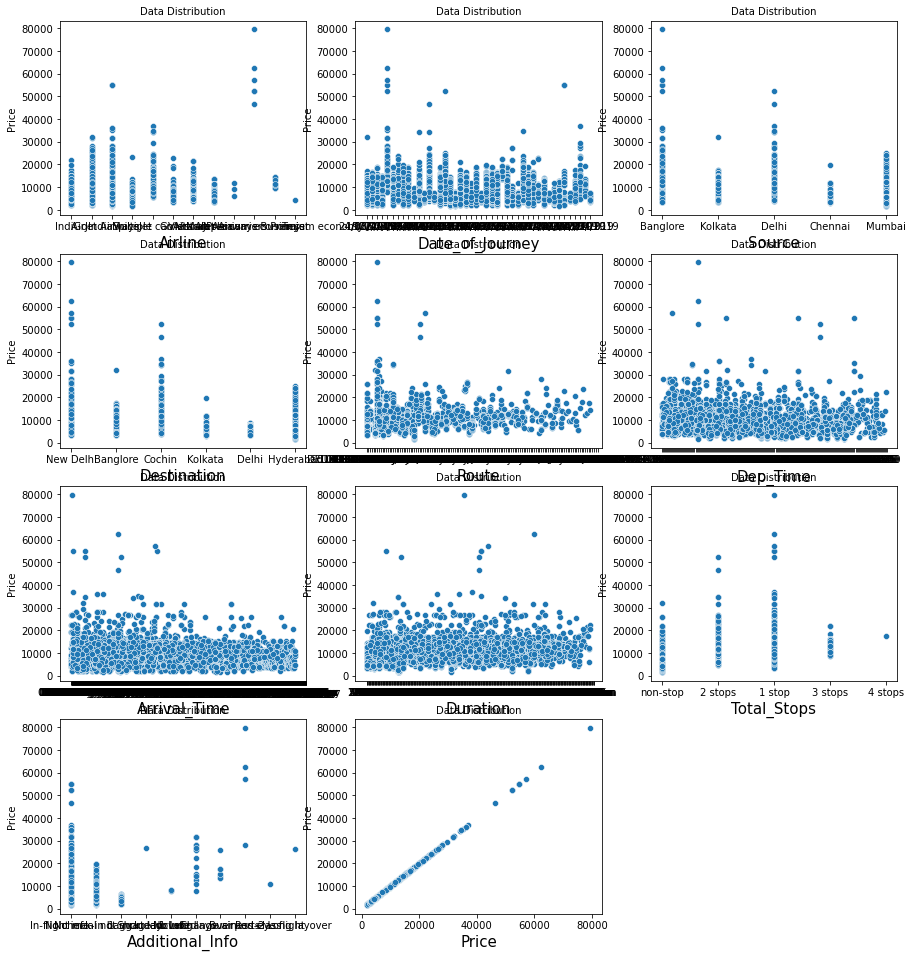

In [97]:
# Now using scatter plot to see the relation of features with label

plt.figure(figsize = [15,25])
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(6,3,plotnumber)
        sns.scatterplot(x = df[column], y= df['Price'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.show()

In the data set There is positive and negative both relationship with features 

In [98]:
df['source'].value_counts()

df1    10682
df2     2671
Name: source, dtype: int64

df1    10682
df2     2671
Name: source, dtype: int64


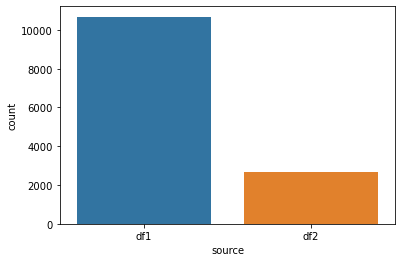

In [99]:
# Using countplot to show the diffrence
sns.countplot(x='source',data=df)
print(df['source'].value_counts())

df1 and df2 data are inbalanced.

In [100]:
# convert string value in integ.using LabelEncoder

LE = LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,3,24,0,5,18,211,264,242,4,8,3897.0,0
1,1,6,3,0,87,31,986,342,1,8,7662.0,0
2,4,43,2,1,122,70,468,106,1,8,13882.0,0
3,3,10,3,0,95,164,1430,317,0,8,6218.0,0
4,3,0,0,5,29,149,1331,309,0,8,13302.0,0


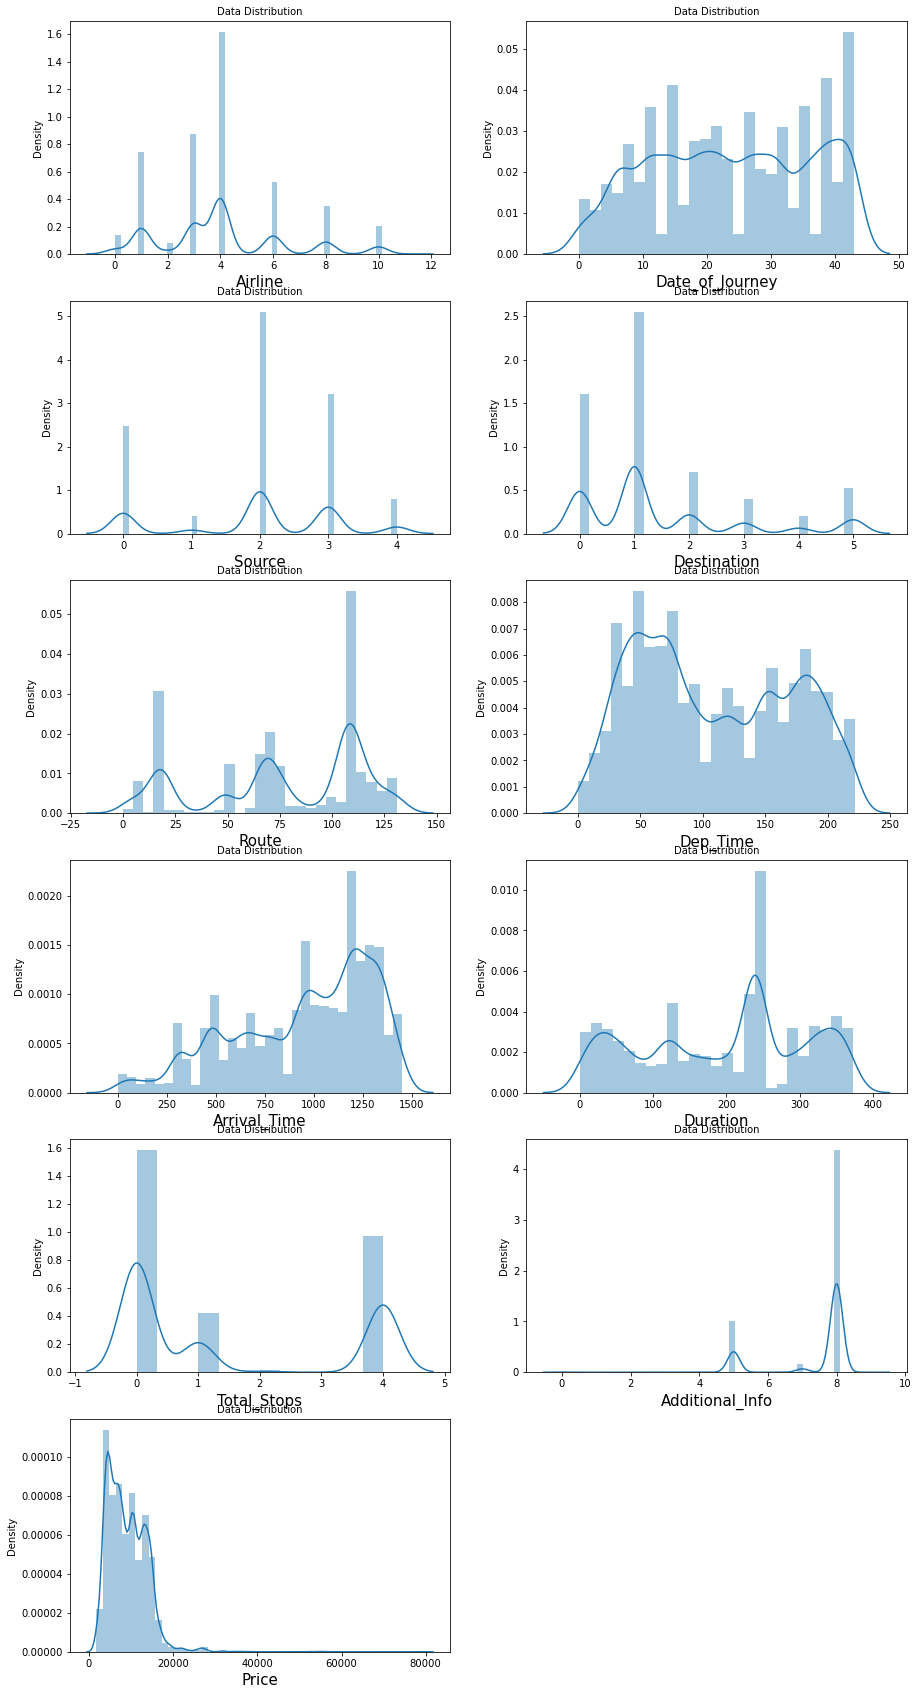

In [101]:
# Now again plotting the dist plot to see the relationship between features and label
plt.figure(figsize=(15,30))
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(x=df[column])
        plt.xlabel(column,fontsize=(15))
        plt.title("Data Distribution",fontsize=(10))
        
    plotnumber+=1
    
plt.show()

only Price showing some normal distribution.rest not any showing normal distribution

In [102]:
# checking skewness
df.skew()

Airline            0.720892
Date_of_Journey   -0.065291
Source            -0.424126
Destination        1.247794
Route             -0.521325
Dep_Time           0.193346
Arrival_Time      -0.651103
Duration          -0.192216
Total_Stops        0.639618
Additional_Info   -1.784632
Price              1.812405
source             1.499934
dtype: float64

Some skewness present in our dataset

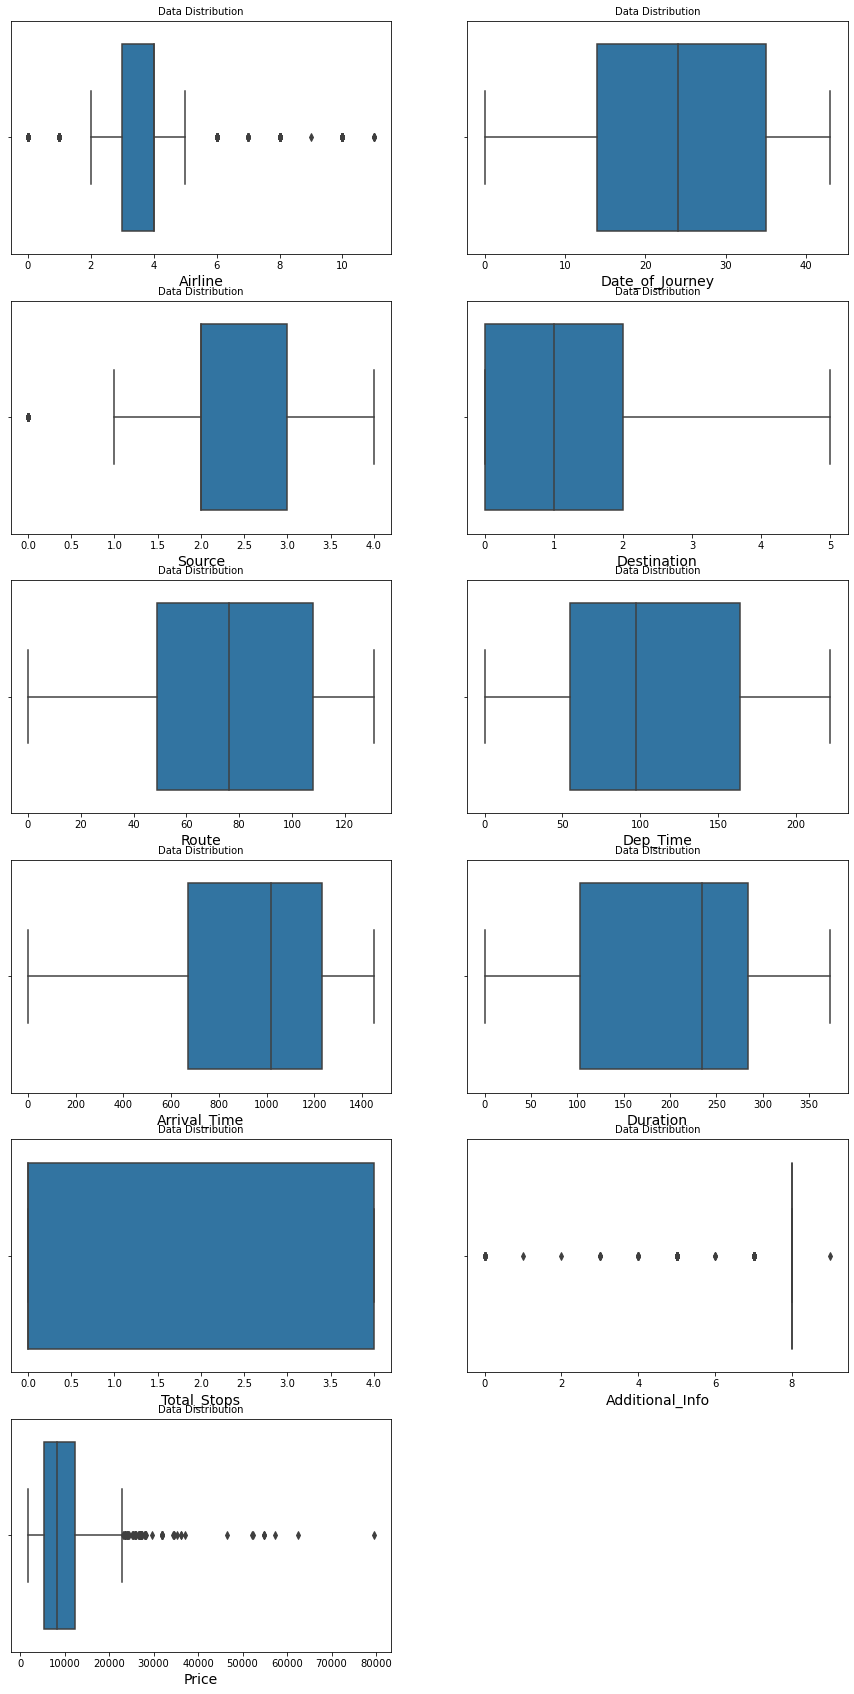

In [103]:
# checking outlierin dataset using boxplot
plt.figure(figsize=(15,30))
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(x= df[column])
        plt.xlabel(column,fontsize=14)
        plt.title('Data Distribution',fontsize=10)
        
    plotnumber+=1
    
plt.show()

Skewness present in our dataset

In [104]:
# Now checking collinearity between the features with the help of heatmap

corr_mat=df.corr()
corr_mat

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
Airline,1.000000,0.021282,-0.018545,0.022104,0.020584,-0.030418,-0.018441,0.028329,0.038171,-0.058490,-0.039565,0.009394
Date_of_Journey,0.021282,1.000000,0.163331,-0.270737,0.270219,-0.010970,-0.011631,-0.002365,-0.043656,0.013253,-0.036907,-0.002298
Source,-0.018545,0.163331,1.000000,-0.589711,0.410152,0.054035,0.016781,-0.185233,-0.223097,-0.022221,0.015999,0.003116
Destination,0.022104,-0.270737,-0.589711,1.000000,-0.475887,-0.058133,-0.029972,0.012837,0.336553,0.027410,-0.071122,-0.000912
Route,0.020584,0.270219,0.410152,-0.475887,1.000000,-0.090312,0.009657,-0.057287,-0.447513,0.035988,0.166974,-0.006176
Dep_Time,-0.030418,-0.010970,0.054035,-0.058133,-0.090312,1.000000,-0.029707,0.046488,0.051669,-0.056096,0.002987,0.007901
Arrival_Time,-0.018441,-0.011631,0.016781,-0.029972,0.009657,-0.029707,1.000000,0.032579,-0.099386,0.012769,0.028746,0.009444
Duration,0.028329,-0.002365,-0.185233,0.012837,-0.057287,0.046488,0.032579,1.000000,0.168763,0.074241,-0.141117,-0.009458
Total_Stops,0.038171,-0.043656,-0.223097,0.336553,-0.447513,0.051669,-0.099386,0.168763,1.000000,0.162074,-0.571221,-0.007884
Additional_Info,-0.058490,0.013253,-0.022221,0.027410,0.035988,-0.056096,0.012769,0.074241,0.162074,1.000000,-0.065463,0.024533


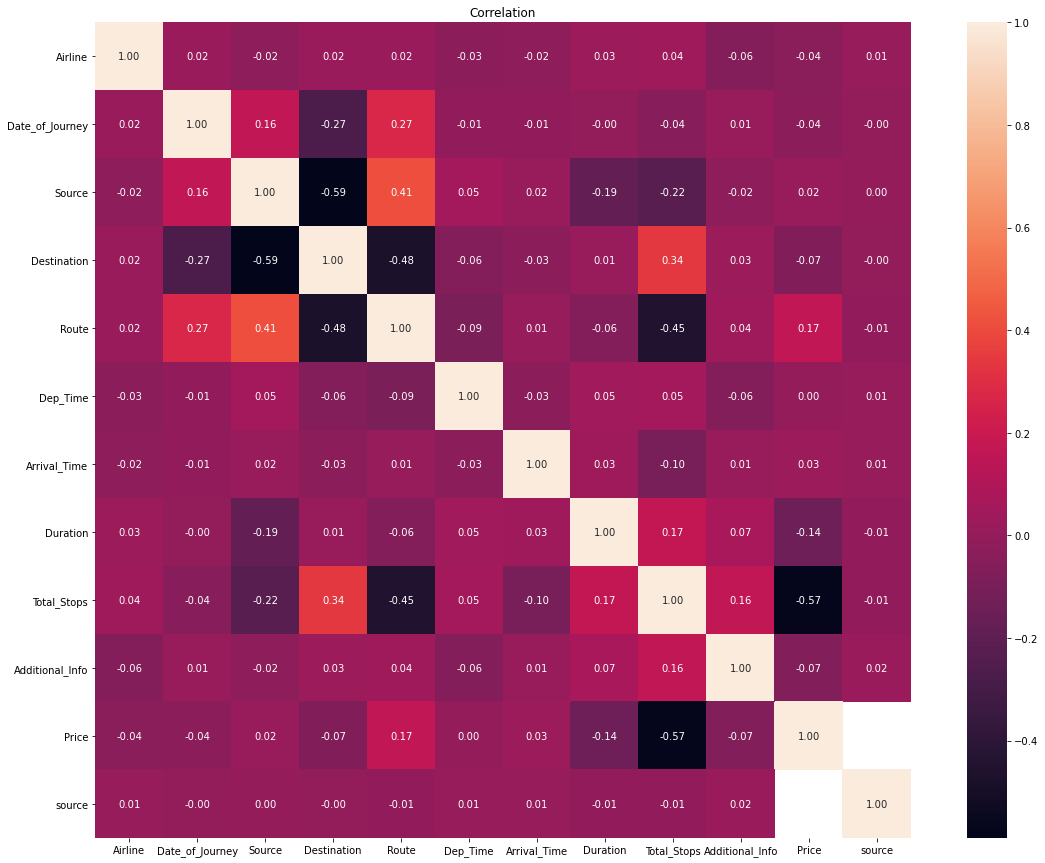

In [105]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True,square=True,fmt='.2f')
plt.title('Correlation')
plt.show()


There are very less relationship between source vs other column.and total_stops vs price is very good relationship

In [106]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,3,24,0,5,18,211,264,242,4,8,3897.0,0
1,1,6,3,0,87,31,986,342,1,8,7662.0,0
2,4,43,2,1,122,70,468,106,1,8,13882.0,0
3,3,10,3,0,95,164,1430,317,0,8,6218.0,0
4,3,0,0,5,29,149,1331,309,0,8,13302.0,0


In [107]:
df1 = df.loc[df['source']==0]
df1.drop(['source'],axis=1,inplace=True)

In [108]:
df2 = df.loc[df['source']==1]
df2.drop(['source'],axis=1,inplace=True)

In [109]:
df2.drop(['Price'],axis=1,inplace=True)

In [110]:
x= df1.drop(['Price'],axis=1)
y= df1['Price']

In [111]:
# Removing outliers
from scipy import stats
z = np.abs(stats.zscore(x))
z

array([[0.41080484, 0.02158081, 1.65835945, ..., 0.4119735 , 1.40720999,
        0.49992092],
       [1.26115217, 1.43744594, 0.89001433, ..., 1.31534664, 0.2537031 ,
        0.49992092],
       [0.01436882, 1.5616646 , 0.04055641, ..., 0.81661396, 0.2537031 ,
        0.49992092],
       ...,
       [0.01436882, 0.42686602, 1.65835945, ..., 0.79139022, 1.40720999,
        0.49992092],
       [2.56541078, 1.92378819, 1.65835945, ..., 0.39390604, 1.40720999,
        0.49992092],
       [1.26115217, 1.48060756, 0.04055641, ..., 1.41471768, 0.2537031 ,
        0.49992092]])

In [118]:
#Storing the zcore > 3 in i

i = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

x = x.drop(x.index[i])
y = y.drop(y.index[i])

In [119]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [120]:
# Model building
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=100)

#### LinearRegression

In [137]:
#Now Model Initiating and Training

lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
score_lr = lr.score(x_test,y_test)
print("Linear regression: Accuracy =",score_lr)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,pred)))
print("Mean Squared Error=",mean_squared_error(y_test,pred))
print("R2 Score :",r2_score(y_test,pred))

Linear regression: Accuracy = 0.3760753573172593
Root Mean Squared Error=  3443.2862969418597
Mean Squared Error= 11856220.522707585
R2 Score : 0.3760753573172593


#### Regularation Process

In [138]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

#### Lasso CV

In [141]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print("R2 score = ",lasso_reg.score(x_test,y_test))
print("Mean Squared Error= ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,pred)))

R2 score =  0.3760767624522334
Mean Squared Error=  11856220.434216304
Root Mean Squared Error=  3443.2862840920307


#### KNN Model

In [144]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=knn.score(x_test,y_test)
print("KNN regression: Accuracy = ",score_knn)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

KNN regression: Accuracy =  0.7015699695026093
Root Mean Squared Error=  2381.377941099935


#### DecisionTree Model

In [147]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
score_dt = dt.score(x_test,y_test)
print("DecisionTreeRegressor:Accuracy=",score_dt)
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred)))

DecisionTreeRegressor:Accuracy= 0.8103192731408811
Root Mean Squared Error= 1898.5352599600471


#### Model Evaluation
##### Checking cross validation score

In [152]:
# Linear Regression
lr_cv = cross_val_score(lr,x,y,cv=10).mean()
lr_cv

0.36920779922490793

In [156]:
# Lasso_cv
lasso_cv = cross_val_score(lasso_reg,x,y,cv=10).mean()
lasso_cv

0.3692078332619146

In [154]:
# KNN Model
knn_cv = cross_val_score(knn,x,y,cv=10).mean()
knn_cv

0.6173672842285951

In [158]:
# DecisionTree Model
dt_cv = cross_val_score(dt,x,y,cv=10).mean()
dt_cv

0.827181410305936

DecisionTree is best model because higher cv score and comparatively less rmse

#### Hyper-Parameter Tuning

In [162]:

dt = DecisionTreeRegressor()
grid_param = {'criterion':['mse'],
             'max_depth':range(1,20,5),
             'min_samples_leaf':range(2,20,6),
             'min_samples_split':range(2,20,2)}

grid_search = GridSearchCV(estimator=dt,param_grid=grid_param,cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter = grid_search.best_params_
print(best_parameter)

{'criterion': 'mse', 'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [161]:
dt=DecisionTreeRegressor(criterion='mse', max_depth=16, min_samples_leaf=2, min_samples_split=6)
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print('DecisionTreeRegressor: Accuracy=',dt.score(x_test,y_test))
print('Mean Square Error=', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error=',np.sqrt(mean_squared_error(y_test,y_pred)))

DecisionTreeRegressor: Accuracy= 0.8159545564840295
Mean Square Error= 5670960.898357366
Root Mean Squared Error= 2381.377941099935


#### Saving model

In [164]:
import joblib

In [165]:
joblib.dump(dt,"Flight_Price_Predicition.obj")

['Flight_Price_Predicition.obj']